In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer        

import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Data collection

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michiard/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-dataset


In [61]:
print(os.listdir(path))

df = pd.read_csv(path+'/train.csv')

print(df.head())

['sample_submission.csv', 'train.csv', 'test.csv']
       textID                                               text  \
0  28ac06f416                        good luck with your auction   
1  92098cf9a7  Hmm..You can`t judge a book by looking at its ...   
2  7858ff28f2   Hello, yourself. Enjoy London. Watch out for ...   
3  b0c9c67f32         We can`t even call you from belgium  sucks   
4  7b36e9e7a5                                 not so good mood..   

                                       selected_text sentiment  
0                        good luck with your auction  positive  
1  Hmm..You can`t judge a book by looking at its ...   neutral  
2                                    They`re mental.  negative  
3                                            m  suck  negative  
4                                 not so good mood..  negative  


In [62]:
print(df.info())
print("Columns: " + df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24732 entries, 0 to 24731
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         24732 non-null  object
 1   text           24732 non-null  object
 2   selected_text  24732 non-null  object
 3   sentiment      24732 non-null  object
dtypes: object(4)
memory usage: 773.0+ KB
None
Index(['Columns: textID', 'Columns: text', 'Columns: selected_text',
       'Columns: sentiment'],
      dtype='object')
(24732, 4)


In [63]:
df.describe(include='all')

,textID,text,selected_text,sentiment
count,24732,24732,24732,24732
unique,24732,24732,20298,3
top,28ac06f416,good luck with your auction,love,neutral
freq,1,1,174,10018


In [64]:
df['sentiment'].value_counts()

sentiment
neutral     10018
positive     7711
negative     7003
Name: count, dtype: int64

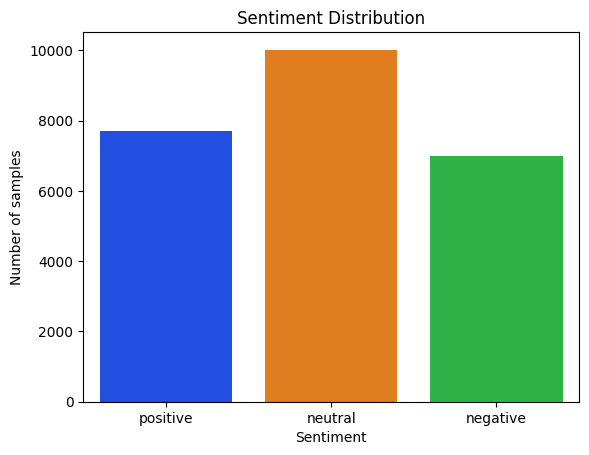

In [65]:
# Plot
sns.countplot(x='sentiment', data=df, palette='bright')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of samples')
plt.show()

# Preprocessing

## Text cleansing

In [66]:
'''
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


# Carica modello spaCy
nlp = spacy.load("en_core_web_sm")

# Stopwords personalizzate (manteniamo le negazioni)
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor'}
stop_words = stop_words.difference(negations)

def preprocess_text(text):
    # Rimuove punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizzazione
    tokens = word_tokenize(text.lower())
    
    # Lemmatizzazione con spaCy (sul testo completamente lowercase)
    doc = nlp(" ".join(tokens).lower())
    lemmatized_tokens = [token.lemma_.lower() for token in doc]

    
    # Rimozione stopwords
    final_tokens = [token for token in lemmatized_tokens if token not in stop_words and token.strip()]
    
    return final_tokens

df['removed_stop_words'] = df['text'].apply(lambda x: preprocess_text(x))
'''

'\nimport nltk\nimport spacy\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nimport string\n\n\n# Carica modello spaCy\nnlp = spacy.load("en_core_web_sm")\n\n# Stopwords personalizzate (manteniamo le negazioni)\nstop_words = set(stopwords.words(\'english\'))\nnegations = {\'no\', \'not\', \'nor\'}\nstop_words = stop_words.difference(negations)\n\ndef preprocess_text(text):\n    # Rimuove punteggiatura\n    text = text.translate(str.maketrans(\'\', \'\', string.punctuation))\n    \n    # Tokenizzazione\n    tokens = word_tokenize(text.lower())\n    \n    # Lemmatizzazione con spaCy (sul testo completamente lowercase)\n    doc = nlp(" ".join(tokens).lower())\n    lemmatized_tokens = [token.lemma_.lower() for token in doc]\n\n    \n    # Rimozione stopwords\n    final_tokens = [token for token in lemmatized_tokens if token not in stop_words and token.strip()]\n    \n    return final_tokens\n\ndf[\'removed_stop_words\'] = df[\'text\'].apply(lambda x: preprocess

In [67]:
!pip install spacy nltk num2words
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.2 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [68]:
import re
import string
import unicodedata
import nltk
import spacy
from nltk.corpus import stopwords
from num2words import num2words

# Downloads if needed
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Custom stopwords keeping negations
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor'}
stop_words = stop_words.difference(negations)

def preprocess_text(text):
    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 2. Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # 3. Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
    
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Convert numbers to words
    def replace_numbers(match):
        return num2words(match.group())
    text = re.sub(r'\b\d+\b', replace_numbers, text)
    
    # 6. Lowercase
    text = text.lower()
    
    # 7. Lemmatize and tokenize with spaCy
    doc = nlp(text)
    
    # 8. Remove stopwords and non-alpha tokens
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.lemma_.lower() not in stop_words and token.lemma_.isalpha()
    ]
    
    return tokens


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
df['removed_stop_words'] = df['text'].apply(lambda x: preprocess_text(x))

In [70]:
df.sample(10)

,textID,text,selected_text,sentiment,removed_stop_words
8922,a9a192ea57,I have to spend lots of our money on a new b...,I have to spend lots of our money on a new bo...,neutral,"[spend, lot, money, new, boilergreat, not, luc..."
21363,793b9c8924,_perfect I`m trying to self learn photoshop bu...,it`s not going so well!,negative,"[perfect, try, self, learn, photoshop, not, go..."
18761,f2eb332205,No one is bringing snacks,No one is bringing snacks,neutral,"[no, one, bring, snack]"
13744,1da15ab6f5,Yes I did see Mitch Hedberg and the whole flo...,g. He`s hilarious. I <3 him. Poor,neutral,"[yes, see, mitch, hedberg, whole, floss, thing..."
19818,7611dbc581,"Haha, that`s great. Yeah, Zachary Quinto as S...",awesome,positive,"[haha, great, yeah, zachary, quinto, spock, re..."
3285,132d174785,yea. I was off today luv. I shudve told u. ...,yea. I was off today luv. I shudve told u. a...,positive,"[yea, today, luv, shudve, tell, u, anything, e..."
5637,cf52aa0a38,Im soooooooo **** hungry!! wat 2 eat??,Im soooooooo **** hungry!! wat 2 eat??,neutral,"[soooooooo, hungry, wat, two, eat]"
11515,30fbdcc263,Did you know if you want to stay cool all day ...,Did you know if you want to stay cool all day ...,neutral,"[know, want, stay, cool, day, use, shower, gel..."
121,56a6f86f09,"yea it looks good, the flower i mean.","yea it looks good,",positive,"[yea, look, good, flower, mean]"
8184,7a10fb8dd0,is it a worldwide number? caause for some rea...,is it a worldwide number? caause for some reas...,neutral,"[worldwide, number, caause, reason, phone, not..."


In [71]:
df[df['removed_stop_words'].apply(lambda tokens: 'mother' in tokens)]


,textID,text,selected_text,sentiment,removed_stop_words
19,fe54c45844,can`t believe I just drove all the way back to...,HAPPY,positive,"[not, believe, drive, way, back, schoolwhateve..."
52,f22dd850f7,happy mother`s day to all the moms out there. ...,happy mother`s day,positive,"[happy, mother, day, mom, hope, never, join, c..."
63,4e53704d24,in about 30 minutes Happy Mothers Day to alll ...,Happy,positive,"[thirty, minute, happy, mother, day, alll, ama..."
93,ee91ba580f,Happy Mother`s Day ~ Did you watch SNL? If n...,Happy Mother`s Day,positive,"[happy, mother, day, watch, snl, not, u, miss,..."
110,8976579aa1,"Mom, where ever you are; Happy Mothers day",Happy,positive,"[mom, ever, happy, mother, day]"
...,...,...,...,...,...
24548,dbb2960dc7,Searching my home for a few things to cook the...,Searching my home for a few things to cook the...,neutral,"[search, home, thing, cook, dinner, evening, m..."
24588,ba0f683c89,"Wishing you a very Happy Mother`s Day, Carina...",Happy,positive,"[wish, happy, mother, day, carina, hugsjoy]"
24626,563148673a,happy mothers day,happy mo,positive,"[happy, mother, day]"
24691,a1c8f1e077,Happy Mothers Day! i hope tom got you somethi...,Happy Mothers Day!,positive,"[happy, mother, day, hope, tom, get, something..."


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the unique sentiment classes you want to generate clouds for
sentiments = ['neutral', 'positive', 'negative']

# Loop through each class
for sentiment in sentiments:
    # Filter the DataFrame by sentiment class
    subset = df[df['sentiment'] == sentiment]

    # Flatten the token lists into a single string
    all_words = ' '.join([' '.join(tokens) for tokens in subset['removed_stop_words']])

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the word cloud (optional)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} WordCloud', fontsize=16)

    # Save the figure locally
    filename = f"{sentiment}_wordcloud.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()  # Close the plot to avoid displaying all of them in notebook

    print(f"Saved: {filename}")


Saved: neutral_wordcloud.png
Saved: positive_wordcloud.png
Saved: negative_wordcloud.png


# RNN 
# Embedding → LSTM → Dropout → Dense (softmax).

In [85]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


## Step 1: Tokenizzazione e Sequenze

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tokenizza il testo
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])

# Converti in sequenze
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Padding
max_len = 50  # lunghezza fissa dei tweet
X_seq = pad_sequences(sequences, maxlen=max_len)

# Encoding delle label (da 'positive', ecc. a [0,1,2])
label_encoder = LabelEncoder()
y_seq = label_encoder.fit_transform(df['sentiment'])

2025-06-04 13:15:45.053445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749042945.431503      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749042945.548257      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Step 2: Split 70/15/15

In [87]:
X_train_seq, X_temp_seq, y_train_seq, y_temp_seq = train_test_split(X_seq, y_seq, test_size=0.30, stratify=y_seq, random_state=42)
X_val_seq, X_test_seq, y_val_seq, y_test_seq = train_test_split(X_temp_seq, y_temp_seq, test_size=0.50, stratify=y_temp_seq, random_state=42)

## Step 3: Costruisci il modello LSTM

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))  # rimosso input_length
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classi

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 4: Addestramento

In [94]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=10,
    batch_size=32
)

Epoch 1/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.5237 - loss: 0.9531 - val_accuracy: 0.6925 - val_loss: 0.7209
Epoch 2/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7595 - loss: 0.6057 - val_accuracy: 0.6951 - val_loss: 0.7155
Epoch 3/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.8181 - loss: 0.4887 - val_accuracy: 0.6884 - val_loss: 0.7675
Epoch 4/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8503 - loss: 0.4002 - val_accuracy: 0.6779 - val_loss: 0.8075
Epoch 5/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8799 - loss: 0.3272 - val_accuracy: 0.6644 - val_loss: 0.9624
Epoch 6/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9024 - loss: 0.2742 - val_accuracy: 0.6574 - val_loss: 1.0652
Epoch 7/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9208 - loss: 0.2221 - val_accuracy: 0.6720 - val_loss: 1.1608
Epoch 8/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9299 - loss: 0.1920 - 

## Step 5: Valutazione

In [95]:
from sklearn.metrics import classification_report, f1_score

# Predizioni (classe con max prob)
y_test_pred_probs = model.predict(X_test_seq)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

print("Test F1 Macro:", f1_score(y_test_seq, y_test_pred, average='macro'))
print(classification_report(y_test_seq, y_test_pred, target_names=label_encoder.classes_))

116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Test F1 Macro: 0.6755196365223357
              precision    recall  f1-score   support

    negative       0.62      0.72      0.67      1051
     neutral       0.65      0.60      0.63      1503
    positive       0.75      0.71      0.73      1156

    accuracy                           0.67      3710
   macro avg       0.68      0.68      0.68      3710
weighted avg       0.67      0.67      0.67      3710



# Embedding → GRU → Dropout → Dense (softmax).

## GRU invece di LSTM

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))  # puoi aumentare output_dim se vuoi
model.add(GRU(64, return_sequences=False))  # sostituisce LSTM
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classi

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Addestramento (uguale a prima)

In [97]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=10,
    batch_size=32
)

Epoch 1/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5371 - loss: 0.9330 - val_accuracy: 0.6900 - val_loss: 0.7154
Epoch 2/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7560 - loss: 0.5974 - val_accuracy: 0.6879 - val_loss: 0.7239
Epoch 3/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.8259 - loss: 0.4555 - val_accuracy: 0.6846 - val_loss: 0.7862
Epoch 4/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8690 - loss: 0.3623 - val_accuracy: 0.6690 - val_loss: 0.8532
Epoch 5/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9020 - loss: 0.2780 - val_accuracy: 0.6666 - val_loss: 0.9677
Epoch 6/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9190 - loss: 0.2344 - val_accuracy: 0.6593 - val_loss: 1.0935
Epoch 7/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9337 - loss: 0.1953 - val_accuracy: 0.6461 - val_loss: 1.2328
Epoch 8/10
541/541 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9425 - loss: 0.1705 - 

## Valutazione:

In [98]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

y_test_pred_probs = model.predict(X_test_seq)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

print("Test F1 Macro:", f1_score(y_test_seq, y_test_pred, average='macro'))
print(classification_report(y_test_seq, y_test_pred, target_names=label_encoder.classes_))

116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Test F1 Macro: 0.6304482728548864
              precision    recall  f1-score   support

    negative       0.61      0.66      0.63      1051
     neutral       0.61      0.52      0.56      1503
    positive       0.66      0.74      0.69      1156

    accuracy                           0.63      3710
   macro avg       0.63      0.64      0.63      3710
weighted avg       0.63      0.63      0.62      3710



### commenti per report
Anche se il testo è già stato tokenizzato in liste di parole (removed_stop_words), per usare un modello RNN in Keras (come LSTM), serve convertirlo in sequenze numeriche. Keras usa il proprio Tokenizer per trasformare frasi in vettori di interi (cioè, ogni parola diventa un numero).
Per questo, dobbiamo unire i token in frasi (processed_text) e poi applicare il Tokenizer di Keras per preparare i dati in formato compatibile con l'RNN.